# PolyMNIST EDA

In [23]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization

## Carga de Datos y Exploración

In [2]:
# Directories for training and testing
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
img_height = 28
img_width = 28

In [4]:
# Function to load images and extract labels
def load_images_from_directory(directory):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            label = int(filename.split('.')[1])  # Extract label from filename
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize the image
            images.append(img_array)
            labels.append(label)
    
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

In [5]:
# Load training and testing data
train_images, train_labels = load_images_from_directory(train_dir)
test_images, test_labels = load_images_from_directory(test_dir)

I0000 00:00:1724464035.110079      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724464035.476399      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724464035.476489      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724464035.480835      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724464035.480926      23 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [6]:
# Display the shape of the data
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing images shape: {test_images.shape}')
print(f'Testing labels shape: {test_labels.shape}')

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28, 1)
Testing labels shape: (10000,)


In [7]:
def display_sample_images(images, labels):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = tf.where(labels == i)[0][0].numpy()  # Find the index of the first occurrence of the label
        axs[i].imshow(images[idx].numpy().reshape(img_height, img_width), cmap='gray')
        axs[i].set_title(f'Label: {i}')
        axs[i].axis('off')
    plt.show()

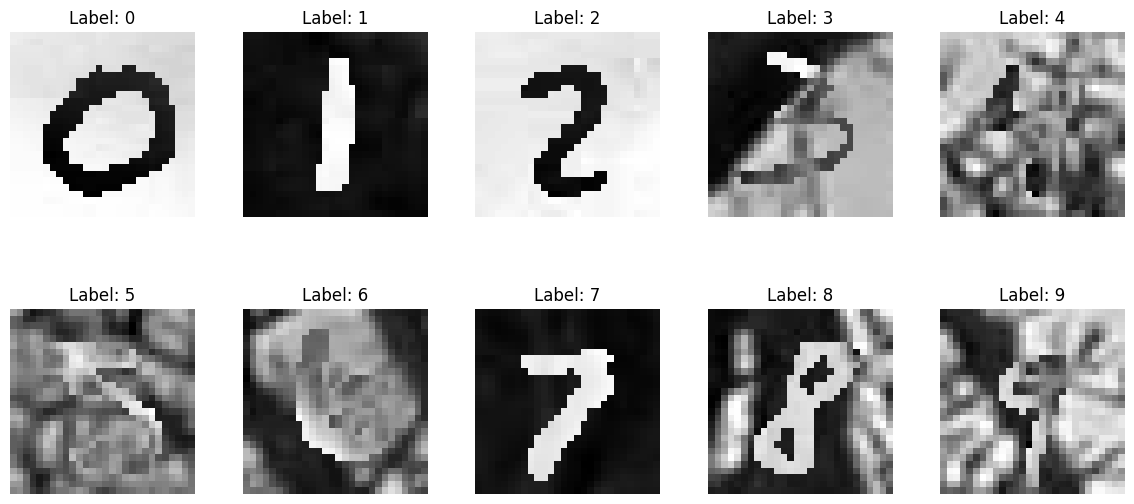

In [8]:
display_sample_images(train_images, train_labels)

Exploramos la distribución de las etiquetas

In [9]:
def display_label_distribution(labels):
    plt.hist(labels, bins=10, color='skyblue', edgecolor='black')
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.show()

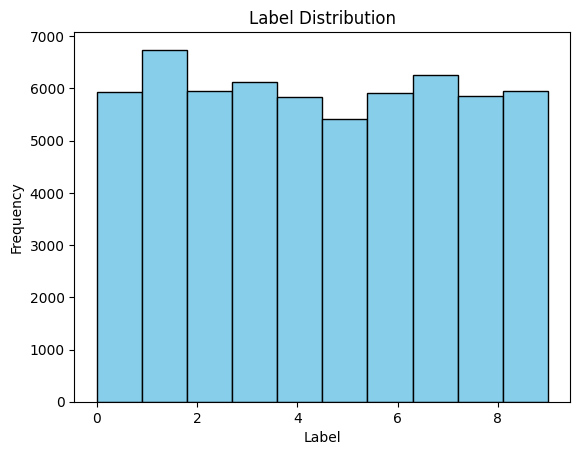

In [10]:
display_label_distribution(train_labels)

In [11]:
print(f'Label 1 count: {tf.reduce_sum(tf.cast(train_labels == 1, tf.int32))}')
print(f'Label 5 count: {tf.reduce_sum(tf.cast(train_labels == 5, tf.int32))}')

Label 1 count: 6742
Label 5 count: 5421


Podemos observar que el conjunto de datos se encuentra **relativamente balanceado**. Las categorías que destacan son la del número 1 con 6742 imágenes (la categoría mayor), mientras ue la del número 5 tiene 5421 (la de la categoría menor). Todas las imágenes se transformaron a valores de **blanco y negro** con el fin de reducir la dimensionalidad; además, las imágenes tienen una dimensionalidad de **28x28 px**.

El conjunto de datos de entrenamiento tiene 60,000 imágenes, mientras que el conjunto de datos de prueba tiene 10,000 imágenes.

## Modelado CNN

### Versión 1

In [43]:
cnn1 = Sequential([
    Input(shape=(img_height, img_width, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

In [44]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos el modelo

In [17]:
cnn1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


I0000 00:00:1724343012.540317    1795 service.cc:146] XLA service 0x7f6c68006450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724343012.540399    1795 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-08-22 16:10:12.611031: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-22 16:10:12.848228: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  46/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1699 - loss: 2.2798

I0000 00:00:1724343016.267461    1795 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7569 - loss: 0.7542 - val_accuracy: 0.9307 - val_loss: 0.2206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9446 - loss: 0.1792 - val_accuracy: 0.9486 - val_loss: 0.1632
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9605 - loss: 0.1285 - val_accuracy: 0.9564 - val_loss: 0.1298
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9687 - loss: 0.0957 - val_accuracy: 0.9630 - val_loss: 0.1179
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9786 - loss: 0.0663 - val_accuracy: 0.9630 - val_loss: 0.1184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9826 - loss: 0.0519 - val_accuracy: 0.9626 - val_loss: 0.1279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0358 - val_accuracy: 0.9648 - val_loss: 0.1219
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accura

### Versión 2
MLP combinado con otra versión de CNN

In [50]:
cnn2 = Sequential([
    Input(shape=(img_height, img_width, 1)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])


In [51]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
cnn2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9194 - loss: 0.2688 - val_accuracy: 0.9684 - val_loss: 0.1013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9420 - loss: 0.1931 - val_accuracy: 0.9525 - val_loss: 0.1674
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9464 - loss: 0.1788 - val_accuracy: 0.9730 - val_loss: 0.0978
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9499 - loss: 0.1697 - val_accuracy: 0.9728 - val_loss: 0.0885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9544 - loss: 0.1531 - val_accuracy: 0.9737 - val_loss: 0.0840
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9561 - loss: 0.1464 - val_accuracy: 0.9734 - val_loss: 0.0880
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9590 - loss: 0.1318 - val_accuracy: 0.9772 - val_loss: 0.0854
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9634 - loss: 0

### Comparación de Modelos

In [21]:
test_loss, test_acc = cnn1.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9608 - loss: 0.1660
Test accuracy: 0.9607999920845032


In [22]:
test_loss, test_acc = cnn2.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.9646 - loss: 0.1204
Test accuracy: 0.9646000266075134


Podemos ver que ambos modelos se encuentran con una precisión de ~96% en el conjunto de datos de prueba. Sí somos más detallados, podemos ver que el segundo modelo tiene una precisión ligeramente mayor que el primero. Esto se debe a que el segundo modelo tiene una arquitectura más compleja, con más capas y más parámetros. Se ve beneficiado por la regularización y la normalización de lotes, lo que ayuda a evitar el sobreajuste; además, la pérdida de prueba es menor en el segundo modelo.

**Modelo seleccionado:** CNN2 

## Guardar Modelo

In [ ]:
cnn2.save('models/cnn2_model.keras')

# Modelado NN simple

In [13]:
fc_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [14]:
fc_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [15]:
fc_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3478 - loss: 1.8496 - val_accuracy: 0.6189 - val_loss: 1.1735
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6227 - loss: 1.1561 - val_accuracy: 0.6517 - val_loss: 1.0673
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6511 - loss: 1.0479 - val_accuracy: 0.6521 - val_loss: 1.0521
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6801 - loss: 0.9793 - val_accuracy: 0.6804 - val_loss: 0.9803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6986 - loss: 0.9222 - val_accuracy: 0.6789 - val_loss: 0.9821
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7098 - loss: 0.8879 - val_accuracy: 0.6981 - val_loss: 0.9387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7164 - loss: 0.8571 - val_accuracy: 0.7061 - val_loss: 0.9121
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7248 - loss: 0.8288 -

In [16]:
test_loss, test_acc = fc_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.7110 - loss: 0.8985
Test accuracy: 0.7110000252723694


# Other model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [27]:
train_images_np = train_images.numpy()
test_images_np = test_images.numpy()

In [29]:
train_images_flat = train_images_np.reshape((train_images.shape[0], -1))
test_images_flat = test_images_np.reshape((test_images.shape[0], -1))

In [30]:
# RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf_model.fit(train_images_flat, train_labels)

RandomForestClassifier(random_state=42)

In [33]:
test_predictions = rf_model.predict(test_images_flat)

In [34]:
test_acc = accuracy_score(test_labels, test_predictions)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.7071


# Image transform

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [63]:
save_dir = 'augmented_images/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [64]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [65]:
for idx in range(len(train_images)):
    image = train_images_np[idx]
    label = train_labels[idx]
    
    batch = datagen.flow(image.reshape((1,) + image.shape), batch_size=1)
    img = array_to_img(batch[0][0])
    
    img_name = f'{label}_{idx}.png'
    
    img.save(os.path.join(save_dir, img_name))

In [66]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [67]:
def load_aug_images_from_directory(directory):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            label = int(filename.split('_')[0])  # Extract label from filename
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize the image
            images.append(img_array)
            labels.append(label)
    
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

In [68]:
train_data_aug, train_labels_aug = load_aug_images_from_directory(save_dir)

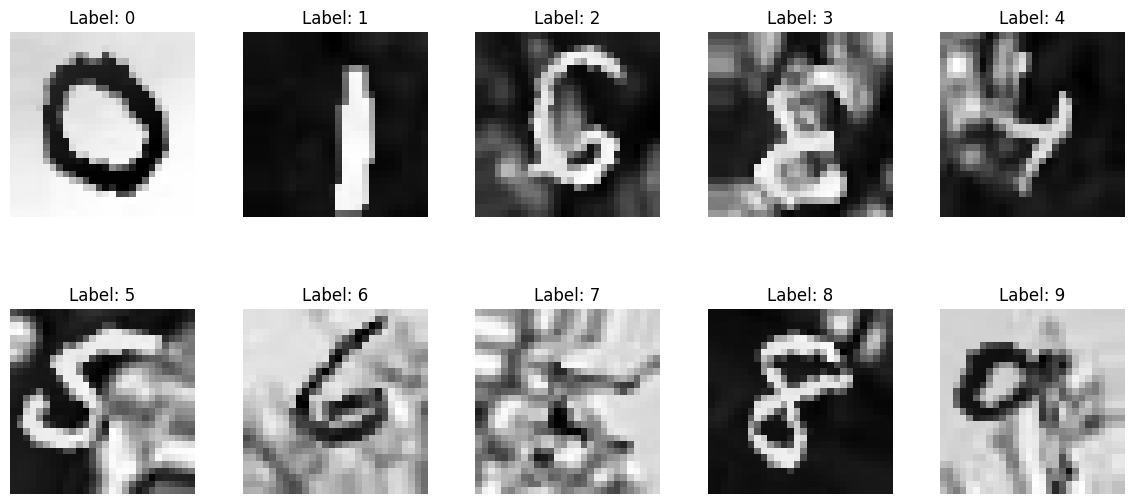

In [70]:
display_sample_images(train_data_aug, train_labels_aug)

### Modelo CNN1

In [71]:
cnn1.fit(train_data_aug, train_labels_aug, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4901 - loss: 1.4425 - val_accuracy: 0.8093 - val_loss: 0.6280
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7438 - loss: 0.7653 - val_accuracy: 0.8126 - val_loss: 0.6047
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7996 - loss: 0.6084 - val_accuracy: 0.8260 - val_loss: 0.5654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8250 - loss: 0.5241 - val_accuracy: 0.8851 - val_loss: 0.3654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8428 - loss: 0.4678 - val_accuracy: 0.8949 - val_loss: 0.3385
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8614 - loss: 0.4124 - val_accuracy: 0.8914 - val_loss: 0.3546
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8763 - loss: 0.3679 - val_accuracy: 0.8925 - val_loss: 0.3520
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8902 - loss: 0.33

### Modelo CNN2

In [72]:
cnn2.fit(train_data_aug, train_labels_aug, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.2340 - loss: 2.2259 - val_accuracy: 0.4756 - val_loss: 1.5981
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5574 - loss: 1.2829 - val_accuracy: 0.6935 - val_loss: 0.8765
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6730 - loss: 0.9872 - val_accuracy: 0.7477 - val_loss: 0.7459
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7367 - loss: 0.8244 - val_accuracy: 0.8773 - val_loss: 0.3686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7612 - loss: 0.7497 - val_accuracy: 0.8609 - val_loss: 0.4313
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7894 - loss: 0.6625 - val_accuracy: 0.8632 - val_loss: 0.4409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8067 - loss: 0.6118 - val_accuracy: 0.9166 - val_loss: 0.2630
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8194 - loss: 0

### Modelo NN Simple

In [73]:
fc_model.fit(train_data_aug, train_labels_aug, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3685 - loss: 1.8844 - val_accuracy: 0.6039 - val_loss: 1.2742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4711 - loss: 1.5191 - val_accuracy: 0.6010 - val_loss: 1.2107
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5068 - loss: 1.4254 - val_accuracy: 0.6113 - val_loss: 1.2282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5271 - loss: 1.3642 - val_accuracy: 0.6089 - val_loss: 1.2232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5446 - loss: 1.3182 - val_accuracy: 0.5989 - val_loss: 1.2362
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5529 - loss: 1.2851 - val_accuracy: 0.6249 - val_loss: 1.1585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5615 - loss: 1.2624 - val_accuracy: 0.5981 - val_loss: 1.2169
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5710 - loss: 1.2432 -

### Other Model

In [75]:
train_images_np_aug = train_data_aug.numpy()
test_images_np = test_images.numpy()

In [76]:
train_images_flat_aug = train_images_np_aug.reshape((train_data_aug.shape[0], -1))
test_images_flat = test_images_np.reshape((test_images.shape[0], -1))

In [77]:
# RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [79]:
rf_model.fit(train_images_flat_aug, train_labels_aug)

RandomForestClassifier(random_state=42)

In [80]:
test_predictions = rf_model.predict(test_images_flat)

In [81]:
test_acc = accuracy_score(test_labels, test_predictions)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.3982


Debido a que los modelos nuevos usando los datos transformados no son mejores que los originales, se decidió utilizar el modelo de CNN2, el cual ha dado el mejor resultado de todos.

# Testing best model

In [83]:
model = tf.keras.models.load_model('models/cnn2_model.keras')

In [89]:
img_path = 'my_numbers/4_2.png'

img = load_img(img_path, target_size=(28, 28), color_mode='grayscale')

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions)

print(f'This is a {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This is a 4
